# **Análise de KPIs para e-commerce**

Objetivo do estudo: A partie de dados fictícios, avaliar o desempenho das vendas em diferentes regiões e categorias de produtos para identificar oportunidades de crescimento e melhoria da margem de lucro.

## Criação do dataframe de estudo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Definindo parâmetros para uma base de dados
num_orders = 500  # Quantidade de registros
np.random.seed(42)


In [2]:
# Categorias e regiões possíveis
categories = ['Eletrônicos', 'Moda', 'Alimentos', 'Beleza', 'Esportes']
regions = ['Sudeste', 'Nordeste', 'Sul', 'Centro-Oeste', 'Norte']

# Gerando dados fictícios
order_id = np.arange(1, num_orders + 1)
sale_date = pd.date_range(start='2023-01-01', periods=num_orders, freq='D')
region = np.random.choice(regions, num_orders)
category = np.random.choice(categories, num_orders)
quantity_sold = np.random.randint(1, 20, num_orders)  # Quantidade vendida por pedido (1 a 20)
revenue = np.random.randint(100, 5000, num_orders)  # Receita em reais (R$100 a R$5000)
cost = np.random.randint(50, 4000, num_orders)  # Custo do produto (R$50 a R$4000)
margin = (revenue - cost) / revenue * 100  # Margem de lucro como porcentagem

# Criando o DataFrame
data_large = {
    'Pedido ID': order_id,
    'Data da Venda': sale_date,
    'Região': region,
    'Categoria': category,
    'Quantidade Vendida': quantity_sold,
    'Receita (R$)': revenue,
    'Custo (R$)': cost,
    'Margem de Lucro (%)': margin
}

df_large = pd.DataFrame(data_large)

# Exibir as primeiras linhas da base
print(df_large.head())

   Pedido ID Data da Venda        Região    Categoria  Quantidade Vendida  \
0          1    2023-01-01  Centro-Oeste       Beleza                  12   
1          2    2023-01-02         Norte  Eletrônicos                  12   
2          3    2023-01-03           Sul     Esportes                   4   
3          4    2023-01-04         Norte    Alimentos                  16   
4          5    2023-01-05         Norte    Alimentos                   4   

   Receita (R$)  Custo (R$)  Margem de Lucro (%)  
0          3611        2767            23.373027  
1          1088         682            37.316176  
2          4216        2152            48.956357  
3          4126        3009            27.072225  
4          4279        3133            26.781958  


## As principais descobertas a partir do estudo

In [21]:
# Receita total
receita_total = df_large['Receita (R$)'].sum()
print('A receita total é de '+ str(receita_total) + ' reais.')

# Margem de lucro média
margem_lucro_media = df_large['Margem de Lucro (%)'].mean().round(2)
print('A margem de lucro total é de ' + str(margem_lucro_media) + '%.')

A receita total é de 1246211 reais.
A margem de lucro total é de -67.49%.


Crescimento de 30,36% em maio de 2023, em relação ao mês anterior, mas quedas expressivas, em fevereiro de 2024 (-17,36%) e maio de 2024 (-53,52%).

In [32]:
# Encontrando a data mais antiga e mais recente
data_inicio = df_large['Data da Venda'].min()
data_fim = df_large['Data da Venda'].max()
print(f"Intervalo de tempo: {data_inicio} até {data_fim}\n")

# Crescimento de vendas
df_large['Mês'] = df_large['Data da Venda'].dt.to_period('M')
receita_mensal = df_large.groupby('Mês')['Receita (R$)'].sum()
print(receita_mensal)

crescimento_mensal = (receita_mensal.pct_change() * 100).round(2)
crescimento_mensal = crescimento_mensal.fillna(0)  # Substitui NaN por 0
print(crescimento_mensal)

Intervalo de tempo: 2023-01-01 00:00:00 até 2024-05-14 00:00:00

Mês
2023-01    79575
2023-02    65650
2023-03    66695
2023-04    58153
2023-05    75809
2023-06    88525
2023-07    79544
2023-08    73172
2023-09    71876
2023-10    84558
2023-11    78390
2023-12    81615
2024-01    84942
2024-02    70192
2024-03    73967
2024-04    77516
2024-05    36032
Freq: M, Name: Receita (R$), dtype: int64
Mês
2023-01     0.00
2023-02   -17.50
2023-03     1.59
2023-04   -12.81
2023-05    30.36
2023-06    16.77
2023-07   -10.15
2023-08    -8.01
2023-09    -1.77
2023-10    17.64
2023-11    -7.29
2023-12     4.11
2024-01     4.08
2024-02   -17.36
2024-03     5.38
2024-04     4.80
2024-05   -53.52
Freq: M, Name: Receita (R$), dtype: float64


## Desempenho por região

Centro-Oeste e Sudeste com maiores receitas. Menor receita com o Norte. A média de margem de lucro por região foi negativa em todas elas, com destaque para o Norte como mais negativo.

In [38]:
desempenho_regiao = df_large.groupby('Região')['Receita (R$)'].sum()
desempenho_regiao = desempenho_regiao.sort_values(ascending=False)
print(desempenho_regiao)

desempenho_regiao_lucro = df_large.groupby('Região')['Margem de Lucro (%)'].mean().round(2)
desempenho_regiao_lucro = desempenho_regiao_lucro.sort_values(ascending=False)
print(desempenho_regiao_lucro)

Região
Centro-Oeste    272050
Sudeste         270250
Nordeste        247249
Sul             229580
Norte           227082
Name: Receita (R$), dtype: int64
Região
Sul             -45.86
Nordeste        -47.01
Sudeste         -49.17
Centro-Oeste    -54.39
Norte          -146.82
Name: Margem de Lucro (%), dtype: float64


<ipython-input-46-526cdb590217>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.values, y=region_revenue.index, palette="viridis", ax=ax[0])
<ipython-input-46-526cdb590217>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_profit_margin.values, y=region_profit_margin.index, palette="magma", ax=ax[1])


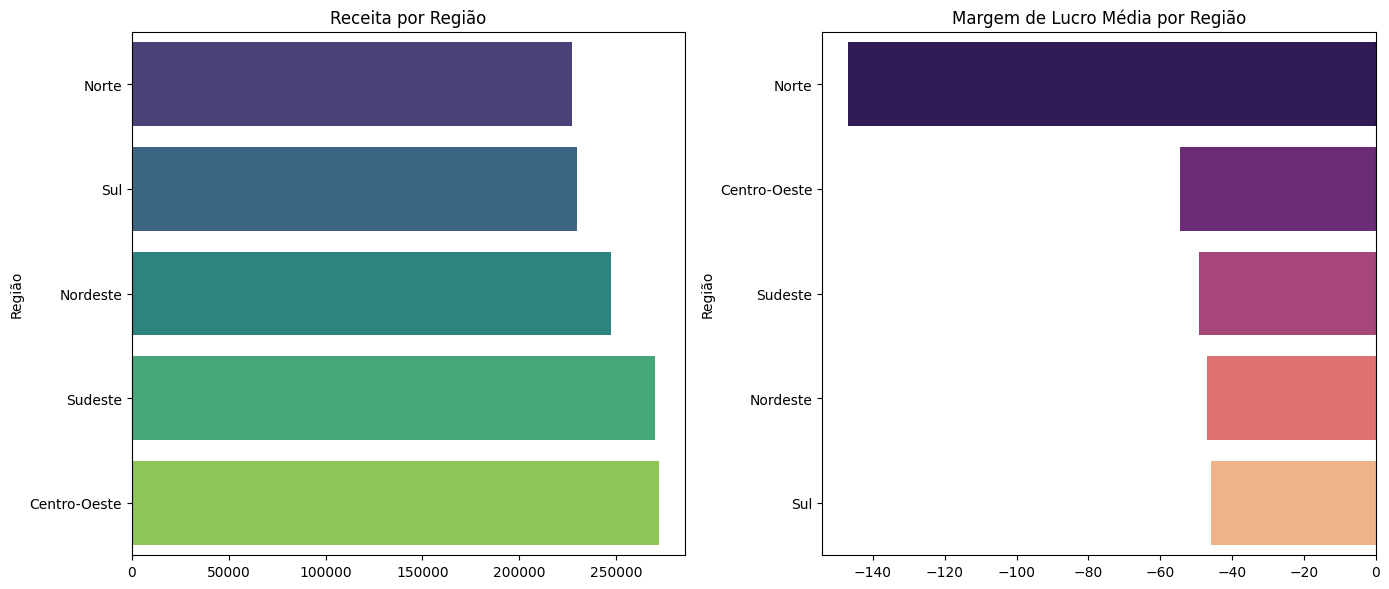

In [46]:
# Receita e margem de lucro por região
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
region_revenue = df_large.groupby('Região')['Receita (R$)'].sum().sort_values()
region_profit_margin = df_large.groupby('Região')['Margem de Lucro (%)'].mean().sort_values()

sns.barplot(x=region_revenue.values, y=region_revenue.index, palette="viridis", ax=ax[0])
ax[0].set_title("Receita por Região")
sns.barplot(x=region_profit_margin.values, y=region_profit_margin.index, palette="magma", ax=ax[1])
ax[1].set_title("Margem de Lucro Média por Região")
plt.tight_layout()
plt.show()

## Desempenho por categoria de produto

Categoria com maior receita foi de Esportes e a menor foi de Alimentos. Em relação à média de margem de lucro por categoria, os Eletrônicos e Beleza têm margens menos negativas que os demais, o que pode indicar potencial para melhor rendimento.

In [42]:
desempenho_categoria = df_large.groupby('Categoria')['Receita (R$)'].sum()
desempenho_categoria = desempenho_categoria.sort_values(ascending=False)
print(desempenho_categoria)

desempenho_categoria_lucro = df_large.groupby('Categoria')['Margem de Lucro (%)'].mean().round(2)
desempenho_categoria_lucro = desempenho_categoria_lucro.sort_values(ascending=False)
print(desempenho_categoria_lucro)

Categoria
Esportes       276658
Eletrônicos    249869
Beleza         248990
Moda           238091
Alimentos      232603
Name: Receita (R$), dtype: int64
Categoria
Eletrônicos   -39.95
Beleza        -41.83
Moda          -64.51
Esportes      -91.89
Alimentos     -95.45
Name: Margem de Lucro (%), dtype: float64


In [40]:
df_large.to_excel('dados_vendas.xlsx', index = False)

#Problemas e possíveis soluções
1. Margem de lucro negativa: Todas as regiões e categorias possuem margens negativas. Esse problema pode ter várias causas, como alto custo de aquisição, custos logísticos ou promoções excessivas.

Solução: Realizar um controle de custos por produto e buscar renegociar com fornecedores. Além disso, avaliar estratégias de precificação para aumentar as margens de produtos mais procurados.

2. Queda no crescimento de vendas em alguns meses: A queda acentuada nas vendas em períodos como fevereiro de 2024 sugere sazonalidade desfavorável ou perda de competitividade nesses períodos.

Solução: Desenvolver campanhas de marketing sazonais e promoções específicas para esses meses ou introduzir novos produtos que tenham demanda contínua.

3. Desempenho regional: Embora a receita seja alta no Centro-Oeste e Sudeste, o Norte teve a pior margem de lucro média, sugerindo que os custos de distribuição ou o mix de produtos podem estar impactando negativamente.

Solução: Rever a logística de transporte e avaliar se produtos de baixa margem no Norte podem ser substituídos por produtos mais lucrativos para a região.